In [171]:
import numpy as np
from analytical_scattering_theories.homogeneous_sphere import mie_compute_q_and_s
from bl_dda.scatterer import Target, IncidentField, DiscreteDipoles


In [172]:
#n= np.array([5,5,5],dtype=int)
n_min=15
f=3

wl_0= 1
m_m=1.33
m_p_com= 1.5+0j

m_p= np.array([m_p_com*1, m_p_com*0.995, m_p_com], dtype=np.complex64)

# dipole separation
lf= wl_0/(10*np.max(np.abs(m_p))) # Yurkin's criteria, 10 dipoles per wavelength inside the scatterer
lf


0.06666666666666667

In [173]:
target1= Target(n_min, lf)

In [174]:
shape_name= 'SPHERE'
target1.fill_volume_elements(shape_name, m_p)
target1.show_target_properties()

----------------target properties--------------
shape_name= SPHERE
n= [15 15 15]
lf= 0.06666666666666667
element_vol= 0.0002962962962962963
num_element_occupy= 1736
address= [292 293 305 306 307 308 309 310 320 321] ...
eper_p= [[2.25    +0.j 2.227556+0.j 2.25    +0.j]
 [2.25    +0.j 2.227556+0.j 2.25    +0.j]
 [2.25    +0.j 2.227556+0.j 2.25    +0.j]
 [2.25    +0.j 2.227556+0.j 2.25    +0.j]
 [2.25    +0.j 2.227556+0.j 2.25    +0.j]
 [2.25    +0.j 2.227556+0.j 2.25    +0.j]
 [2.25    +0.j 2.227556+0.j 2.25    +0.j]
 [2.25    +0.j 2.227556+0.j 2.25    +0.j]
 [2.25    +0.j 2.227556+0.j 2.25    +0.j]
 [2.25    +0.j 2.227556+0.j 2.25    +0.j]] ...
-----------------------------------------------


In [186]:
alpha= np.zeros((3,2),dtype=np.float32)
alpha[0,:]= [2, 3]

alpha

array([[2., 3.],
       [0., 0.],
       [0., 0.]], dtype=float32)

In [176]:
discrete_dipoles= DiscreteDipoles(target1, incidentfield1)

discrete_dipoles.fill_volume_elements(shape_name, m_p)

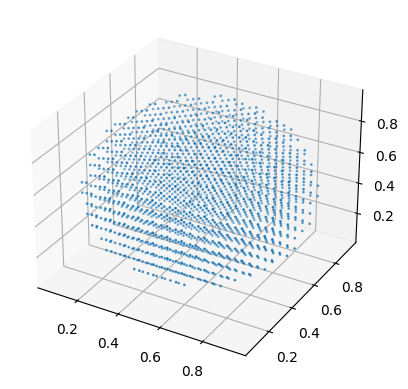

In [177]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(discrete_dipoles.pos[:,0], discrete_dipoles.pos[:,1], discrete_dipoles.pos[:,2], s=1)

In [178]:
discrete_dipoles.set_interaction_matrix()

In [179]:
discrete_dipoles.solve_matrix_equation()

bl_cocg_rq_jpre: iter= 0, rel_err= 1.4982041120529175
bl_cocg_rq_jpre: iter= 1, rel_err= 0.22787712514400482
bl_cocg_rq_jpre: iter= 2, rel_err= 0.05592213198542595
bl_cocg_rq_jpre: iter= 3, rel_err= 0.008992251008749008
iter_fin, err_fin = 3, 0.008992251008749008


In [180]:
discrete_dipoles.ve_radius

0.4970450786634609

In [181]:
r_p= discrete_dipoles.ve_radius
Q_sca_mie, Q_abs_mie, Q_ext_mie, S11_mie, S22_mie = mie_compute_q_and_s(wl_0,m_m,r_p,m_p_com,nang=3)

In [182]:
C_abs= discrete_dipoles.compute_C_abs()
Q_abs= C_abs/(np.pi*discrete_dipoles.ve_radius**2)
Q_abs/Q_abs_mie

array([ -883242.75, -7057282.5 ], dtype=float32)

In [183]:
C_ext= discrete_dipoles.compute_C_ext()
Q_ext= C_ext/(np.pi*discrete_dipoles.ve_radius**2)
Q_ext/Q_ext_mie

# CMRR array([0.96906173, 0.9690602 ], dtype=float32)

array([0.9918952 , 0.90918446], dtype=float32)

In [184]:
Q_ext

array([0.5277371 , 0.48373088], dtype=float32)

In [185]:
m_p

array([1.5   +0.j, 1.4925+0.j, 1.5   +0.j], dtype=complex64)